# Exercise 01 - Simulation of the 1d-Ising-model

The one-dimensional Ising-model is studied via a Monte-Carlo-Simulation and the results will be compared to analytically calculated solutions.

## Theory

Consider a 1-dimensional chain of spins with length $N$ $\mathbf{s_N}=(\uparrow,\downarrow,\downarrow,\uparrow,\dots)$ where each spin can take the value $s_n=\pm 1$. This chain of spins lies in a heat bath with temperature $T$ and is exposed to an external magnetic field of strength $h$. Following this the Hamiltonian is given as 

$$\mathcal{H}(s)=-J\sum_{\langle x,y\rangle}s_xs_y-h\sum_{x}s_x. $$
1. *Discuss the physical meaning of J, in particular the sign of J, and the role it plays in magnets, for example.*

Here $J$ describes the strength of the spin-spin-coupling. For $J<0$ $\mathcal{H}(s)$ describes a repulsive potential between the spins (antiferromagnetic) $J>0$ $\mathcal{H}(s)$ describes an attractive potential (ferromagnetic). Trivially for $J=0$ no interaction between spins take place.

2. *Clarify what it means to have periodic boundary conditions (nearest neighbors).* 

To simulate an *infinite* chain of spins one employs periodic boundary conditions, which means that each element of the chain $s_n$ has the nearest neighbors $s_{n-1}$ and $s_{n+1}$ regardless of the actual position in the chain. That means if $n=N$ ($n=0$) the nearest neighbors are $[N-1,0]$ ($[N,1]$). 

The probability of finding a specific spin configuration $\mathbf{s_N}$ is given by 

$$\mathbf{P}(\mathbf{s})=\exp{\bigg(-\frac{\mathcal{H}(\mathbf{s})}{k_bT}\bigg)}/\sum_{\mathbf{s'}}\exp{\bigg(-\frac{\mathcal{H}(\mathbf{s'})}{k_bT}\bigg)}:=\frac{1}{Z}\exp{\bigg(-\frac{\mathcal{H}(\mathbf{s'})}{k_bT}\bigg)}$$

with the partition function $Z:=\sum_{\mathbf{s'}}\exp{\left(\frac{-\mathcal{H}(\mathbf{s'})}{k_BT}\right)}$ which can be calculated analytically (see e.g. [this wikipedia-article](https://en.wikipedia.org/wiki/Ising_model#Ising's_exact_solution) ) to be 
$$Z=\lambda_+^N+\lambda_-^N ; \lambda_\pm=e^{\frac{J}{T}}\bigg(\cosh\big(\frac{h}{T}\big)\pm\sqrt{\sinh\big(\frac{h}{T}\big)^2+e^{-4\frac{J}{T}}}\bigg)$$
where we set $k_B=1$.

*Since we work units where $k_B=1$, what are the relevant dimensionless ratios in the problem?*

This leads to $\frac{J}{T}$ and $\frac{h}{T}$ to be dimensionless.

With the partition function one can calculate the magnetization per spin $$\langle m \rangle = \frac{T}{N}\frac{\partial\log Z}{\partial h }=\frac{1-(\lambda_-^N/\lambda_+^N)}{1+(\lambda_-^N/\lambda_+^N)}\frac{\left(\sinh{\frac{h}{T}}\right)}{\sqrt{\sinh{\frac{h}{T}}^2+e^{-4J/T}}}\overset{N\to\infty}{=}\frac{\left(\sinh{\frac{h}{T}}\right)}{\sqrt{\sinh{\frac{h}{T}}^2+e^{-4J/T}}}$$
## Aim of the code




3. *Implement the Ising 1d simulation: determine an estimate for magnetization per spin* $$\langle m\rangle=-\frac{T}{N}\frac{\partial \log{Z}}{\partial h}$$ *and estimate the error of your estimate.*

### Numerical approach

In [1]:
# Import packages
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
# Set constants
N=20
ensamble_length=100000
T=300
J=1
h=1

# A method to set the plot parameters and make them beautiful ;)
def beauty_plot():
    plt.figure(figsize=(10,5))
    plt.minorticks_on()
    plt.rcParams["mathtext.fontset"]="cm"
    plt.rcParams['errorbar.capsize'] = 3
    plt.rcParams['mathtext.rm'] = 'serif'
    font={'family' : 'serif','size'   : 22}
    plt.rc("font",**font)
    plt.xticks(fontsize=22,fontname='DejaVu Serif')
    plt.yticks(fontsize=22,fontname='DejaVu Serif')
    plt.grid(color='black',linestyle=':')
    
# Define the Hamiltonian
def Hamiltonian(s,h):
    neighbor_sum = 0
    spin_sum = 0 
    for i in range(0,len(s)):
        # Sum the nearest neighbors of the current position. Apply the boundary conditions
        try:
            neighbor_sum += s[i]*s[i+1]
            spin_sum += s[i]
        except:
            neighbor_sum+=s[i]*s[0]
            spin_sum += s[i]

    return -J*neighbor_sum-h*spin_sum

#Calculate the expectation value
def numerical(N,h):
    # Create *ensable_length* spin ensambles. Each ensable contains N elements
    ensamble = []
    for i in range(0, ensamble_length):
        ensamble.append(2*np.random.randint(0,2,size=N)-1)
    denominator = 0
    nominator = 0
    for s in ensamble:
        denominator+=np.sum(s)*np.exp(-Hamiltonian(s,h)/T)
        nominator+=np.exp(-Hamiltonian(s,h)/T)
    expectation_m = denominator/N/nominator
    
    return expectation_m

### Analytical approach
To compare the numerical resolutions with the analytical ones, the following code represents the shown equations

In [2]:
def lamda(sign, h):
    return np.exp(J/T)*(np.cosh(h/T)+sign*np.sqrt(np.sinh(h/T)**2+np.exp(-4*J/T)))
    

def analytical(inf, N, h):
    if inf == True:
        return np.sinh(h/T)/(np.sqrt(np.sinh(h/T)**2+np.exp(-4*J/T)))
    else:
        return (1-(lamda(-1, h)**N/lamda(1, h)**N))/(1+(lamda(-1, h)**N/lamda(1, h)**N))*(np.sinh(h/T))/(np.sqrt(np.sinh(h/T)**2+np.exp(-4*J/T)))



### Results and comparison

#### 1. The number of spins N for fixed h
The number of spins $N\in[10,20]$ was chosen, because  the possible combination count of $10!=3628800$ is higher than the possible spin combinations that are represented in the spin ensamble. The constant external fieldstrength $h=1$.

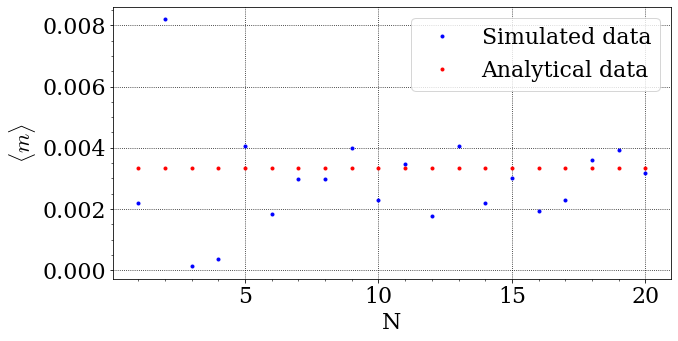

In [3]:
N=np.linspace(1,20, 20)
h=1
expectations_simulated_varN = []
expectations_analytical_varN = []

# Run the simulation and analytical approach for variable N and fixed h
for n in N:
    expectations_simulated_varN.append(numerical(int(n),h))
    expectations_analytical_varN.append(analytical(False,int(n),h))

beauty_plot()
plt.plot(N,expectations_simulated_varN, ".", color="blue", label="Simulated data")
plt.plot(N,expectations_analytical_varN, ".", color="red", label="Analytical data")
plt.xlabel("N",fontsize=22,fontname='DejaVu Serif')
plt.ylabel("$\\langle m \\rangle$",fontsize=22,fontname='DejaVu Serif')
plt.legend()
plt.show()

Hier kommt eine diskussion hin

#### 2. The external field strength h for a fixed N
The external field strength h$\in[-1,1]$ and N=20.

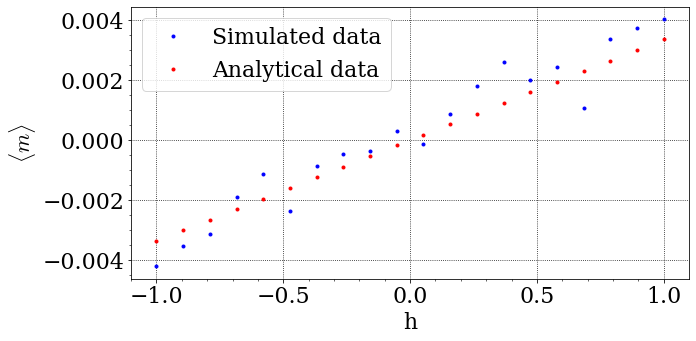

In [4]:
N=20
h=np.linspace(1,-1, 20)
expectations_simulated_varh = []
expectations_analytical_varh = []

# Run the simulation and analytical approach for variable h and constant N
for H in h:
    expectations_simulated_varh.append(numerical(N,float(H)))
    expectations_analytical_varh.append(analytical(False,N,float(H)))

# Plot the results in a beautiful way ;)
beauty_plot()
plt.plot(h,expectations_simulated_varh, ".", color="blue", label="Simulated data")
plt.plot(h,expectations_analytical_varh, ".", color="red", label="Analytical data")
plt.xlabel("h",fontsize=22,fontname='DejaVu Serif')
plt.ylabel("$\\langle m \\rangle$",fontsize=22,fontname='DejaVu Serif')
plt.legend()
plt.show()

Hier kommt eine diskussion hin

#### 3. Comparison for $N\rightarrow \infty$ 
The so called *thermodynamic limit* is reached for $N\rightarrow \infty$. The results for this case are:

In [5]:
printmd(f"Analytical: $\\langle m \\rangle = ${analytical(True, 20,1)}")
printmd(f"Numerical: $\\langle m \\rangle = ${numerical(20,1)}")

Analytical: $\langle m \rangle = $0.003355617116083284

Numerical: $\langle m \rangle = $0.003515504617324021